In [1]:
# Import yang dibutuhkan 

import numpy as np
import pandas as pd
from PIL import Image

In [2]:
# Memanggil dataframe

# Tentukan URL file Excel
excel_url = 'https://github.com/ardhiraka/PFDS_sources/raw/master/Canada.xlsx'

# Baca file Excel dengan engine 'openpyxl'
df_can = pd.read_excel(excel_url, 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2,
                       engine='openpyxl')


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
# Bersihkan data

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis = 1)

years = list(map(str, range(1980, 2014)))
print ('data dimension:', df_can.shape)

data dimension: (195, 38)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11404\411971453.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


# Visualizing Data Using Matplotlib

In [6]:
# import matplotlib

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

mpl.__version__

'3.7.1'

# Word Clouds

In [7]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed adm imported!')

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB 1.4 MB/s eta 0:00:01
   --------------- ----------------------- 61.4/151.4 kB 825.8 kB/s eta 0:00:01
   -------------------------------- ------- 122.9/151.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 825.7 kB/s eta 0:00:00
Wordcloud is installed adm imported!


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import requests

novel_url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt"
nama_file = "alice_novel.txt"

response = requests.get(novel_url)

if response.status_code == 200:
    # Menyimpan isi unduhan ke dalam file lokal
    with open(nama_file, 'wb') as file:
        file.write(response.content)
    print(f"Novel telah berhasil diunduh sebagai {nama_file}")
else:
    print("Gagal mengunduh novel")

Novel telah berhasil diunduh sebagai alice_novel.txt


In [10]:
alice_novel = open(nama_file, 'r').read()

In [11]:
# menggunakan stopwords

stopwords = set(STOPWORDS)

In [12]:
# membuat word cloud hanya dengan menggunakan 2000 kata pertama

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

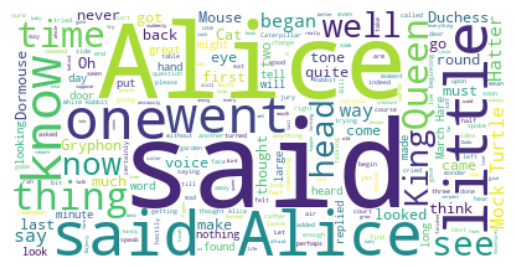

In [13]:
# mari kita visualisasikan

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

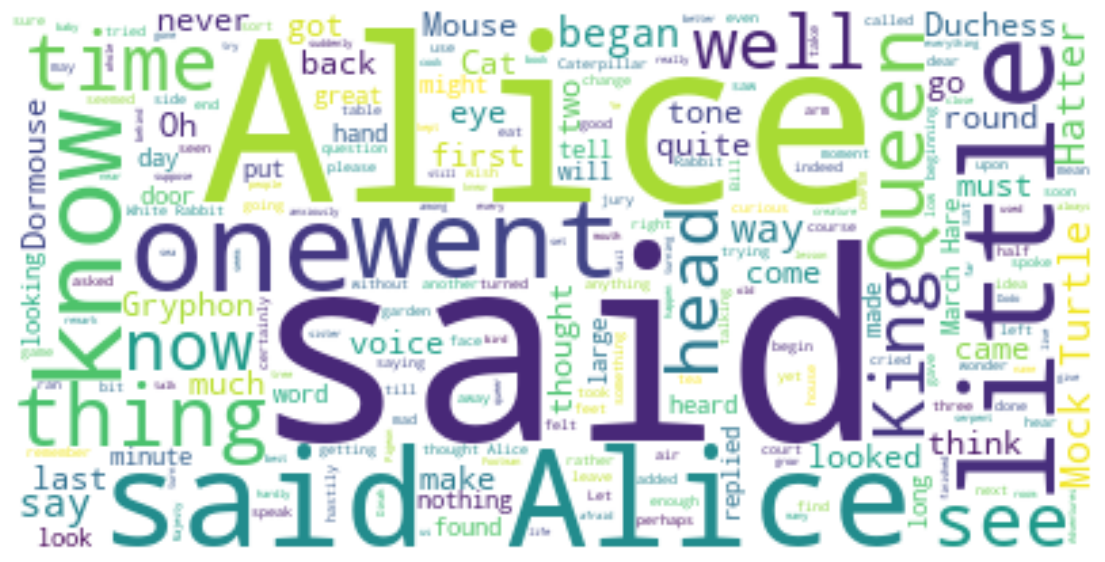

In [14]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
stopwords.add('said')

In [16]:
alice_wc.generate(alice_novel)

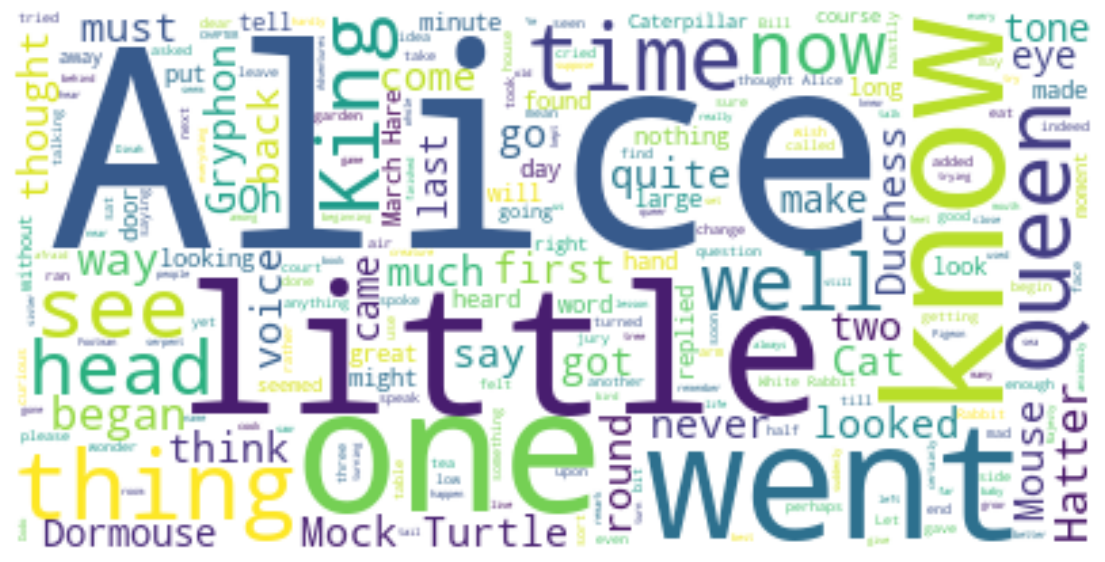

In [17]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# Memanggil file 'alice_mask.png' berada
directory_path = 'C:\\Users\\LENOVO\\anaconda3\\Sesi 8\\'  

path_mask = directory_path + 'alice_mask.png'

# Memuat gambar menggunakan Pillow
mask_image = Image.open(path_mask)

In [26]:
alice_mask = np.array(Image.open(path_mask))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

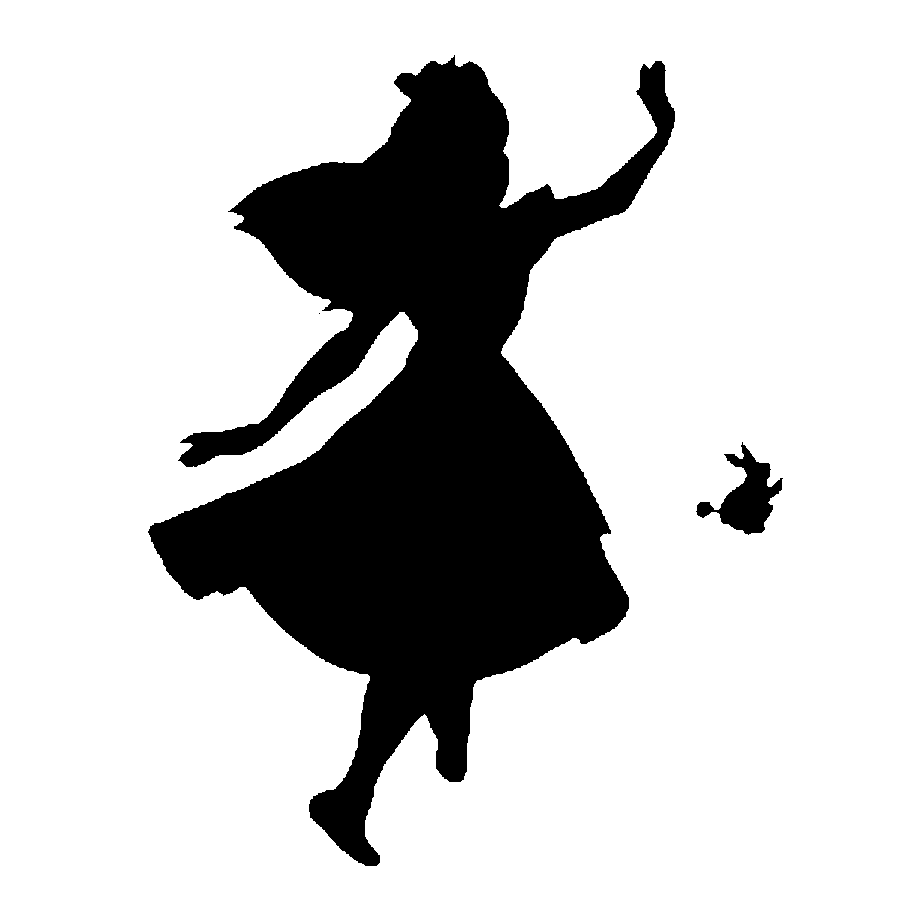

In [27]:
Image.open(path_mask)

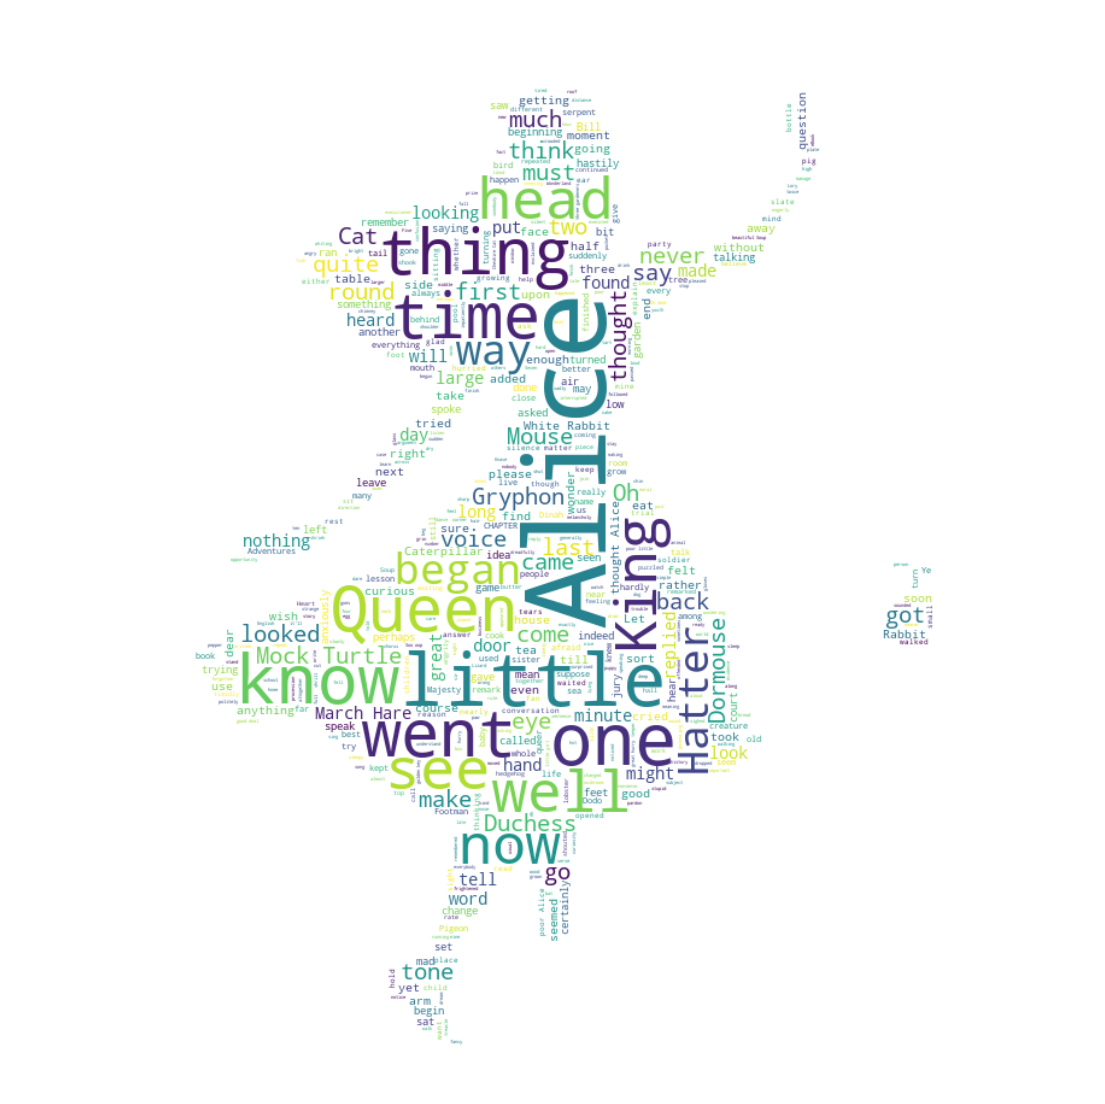

In [28]:
alice_wc = WordCloud(
                background_color='white',
                max_words=2000,
                stopwords=stopwords,
                width = 1350,
                height = 1050,
                mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [30]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [31]:
max_words = 90
word_string = ''

for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [32]:
# membuat word cloud

wordcloud = WordCloud(background_color='white').generate(word_string)

print('word cloud created')

word cloud created


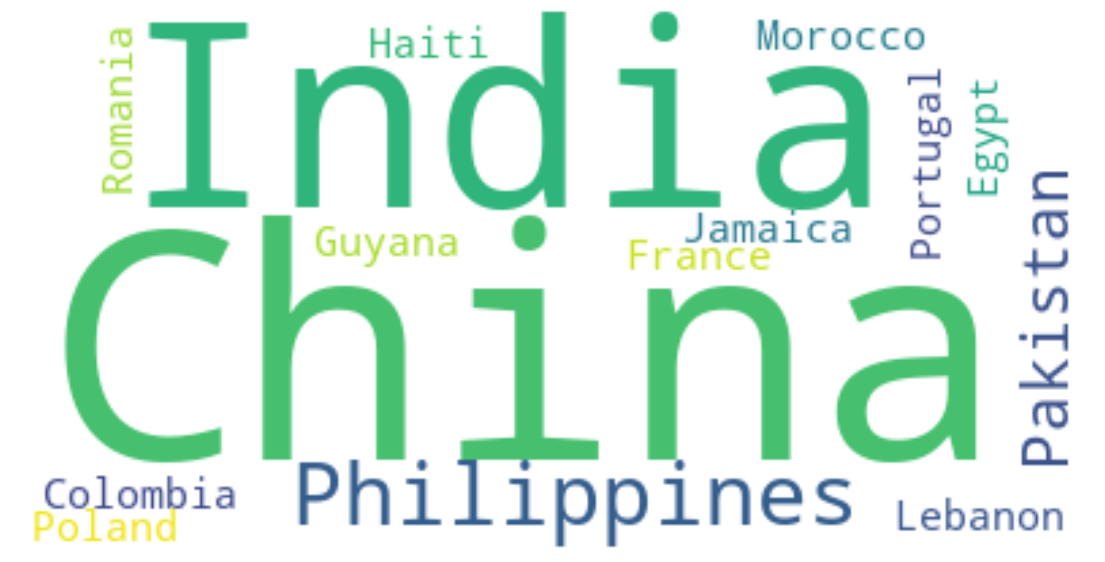

In [33]:
# display the cloud

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

In [34]:
!pip install seaborn

import seaborn as sns

print('seaborn installed and imported')

Defaulting to user installation because normal site-packages is not writeable
seaborn installed and imported


In [35]:
# buat df baru yang menyimpan jumlah total imigran ke kanada per tahun dari 1980 - 2013

df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# merubah menjadi float
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)

df_tot.columns = ['years', 'total']

df_tot.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


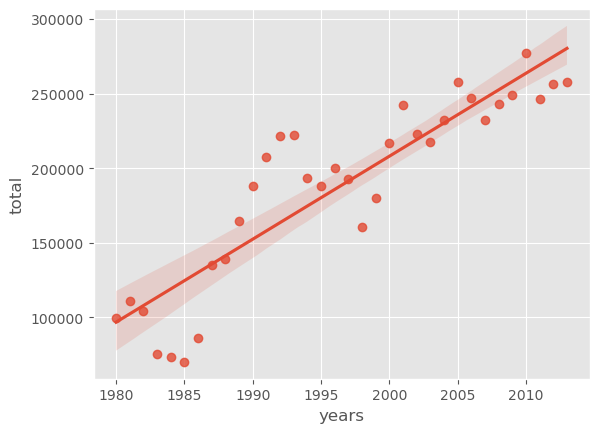

In [36]:
# memanggil fungsi regplot

import seaborn as sns
ax = sns.regplot(x='years', y='total', data=df_tot)

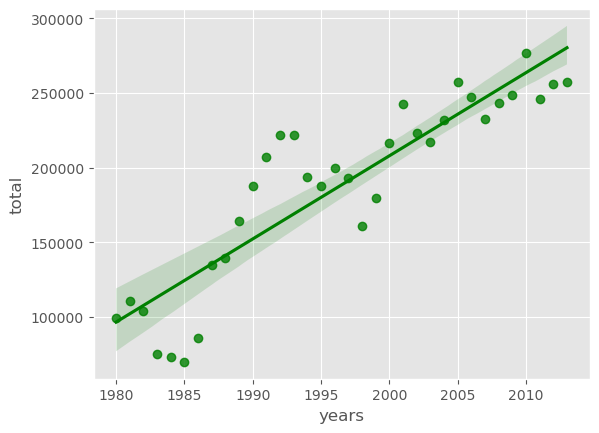

In [37]:
# mengubah warna

ax = sns.regplot(x='years', y='total', data=df_tot, color='green')

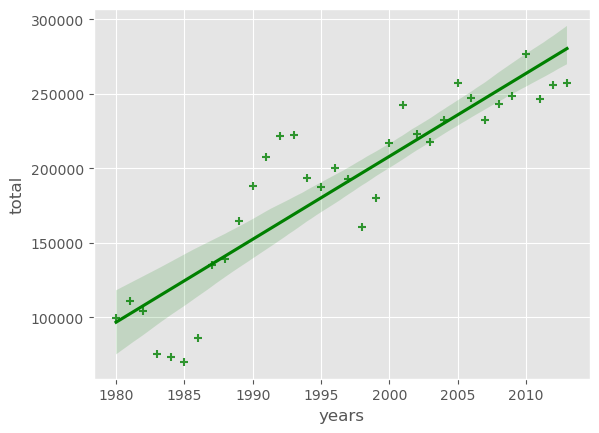

In [38]:
# menyesusaikan marker

ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+')

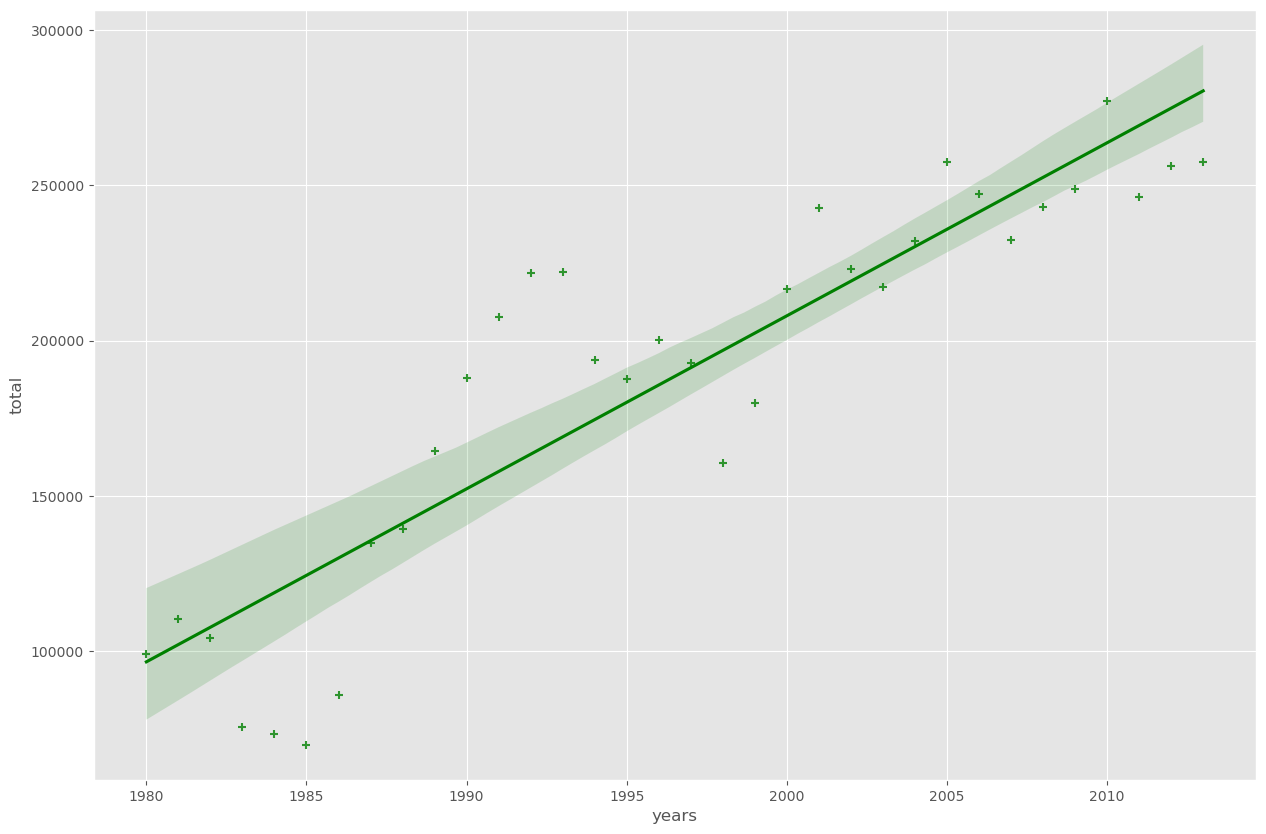

In [39]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

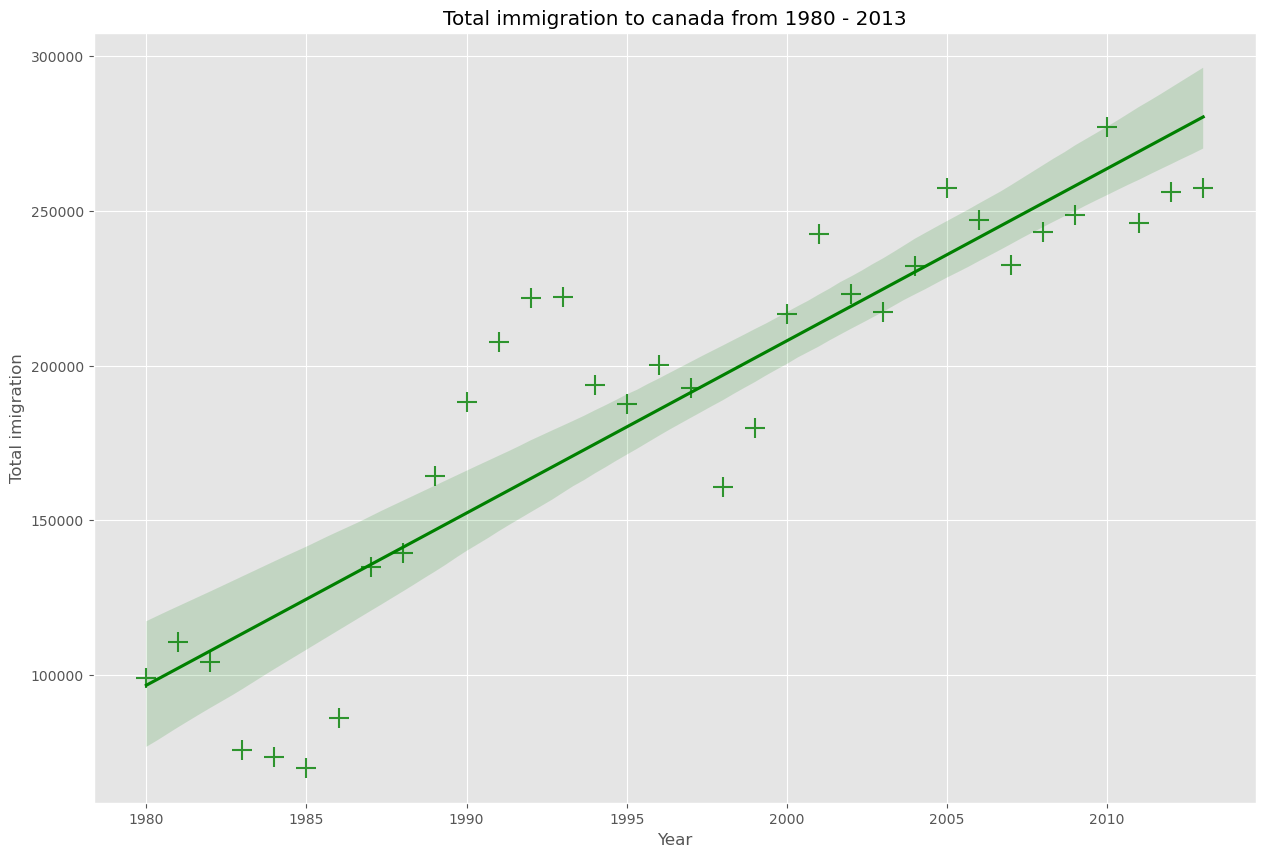

In [40]:
#meningkatkan ukuran marker

plt.figure(figsize=(15, 10))
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

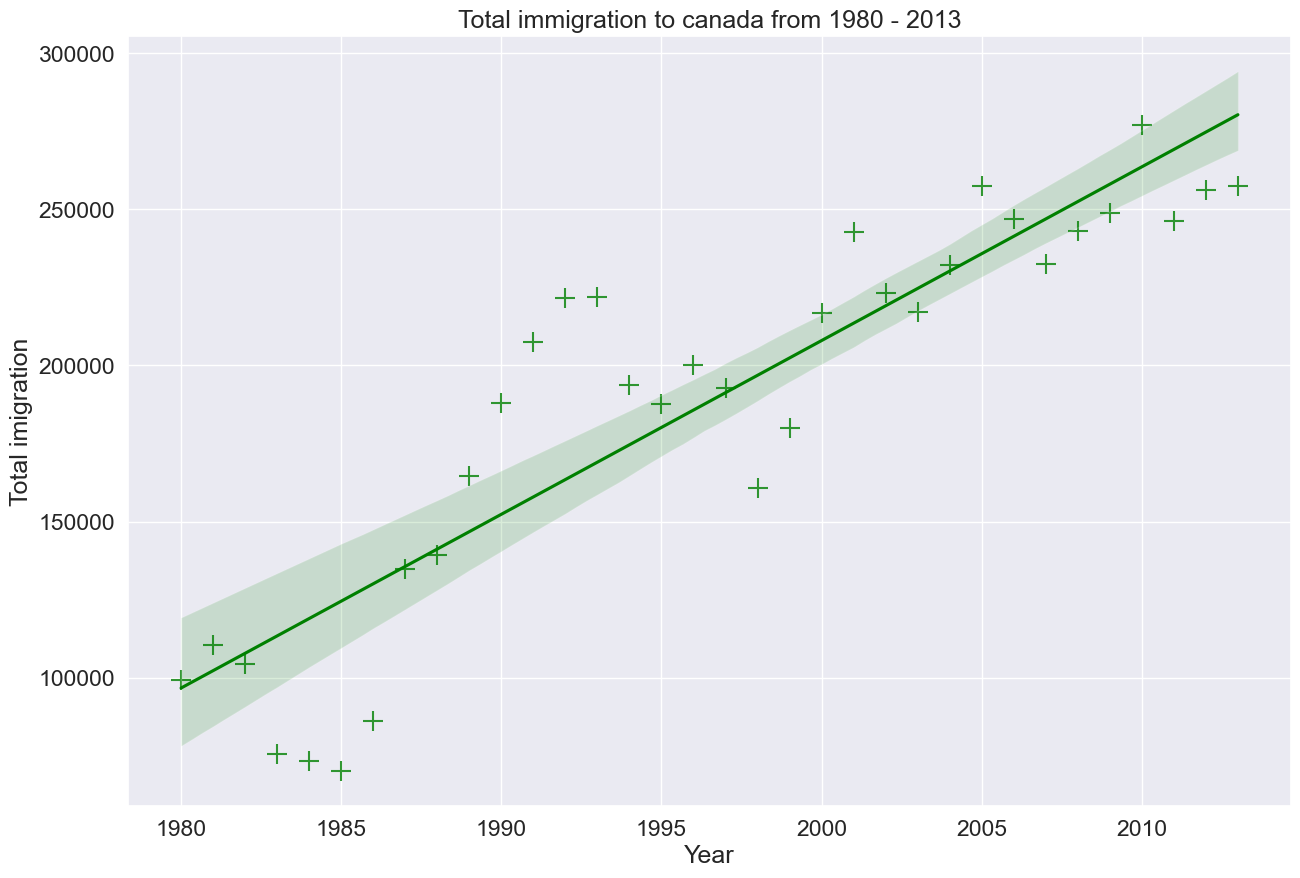

In [41]:
# meningkatkan ukuran font pada label 
#meningkatkan ukuran marker

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

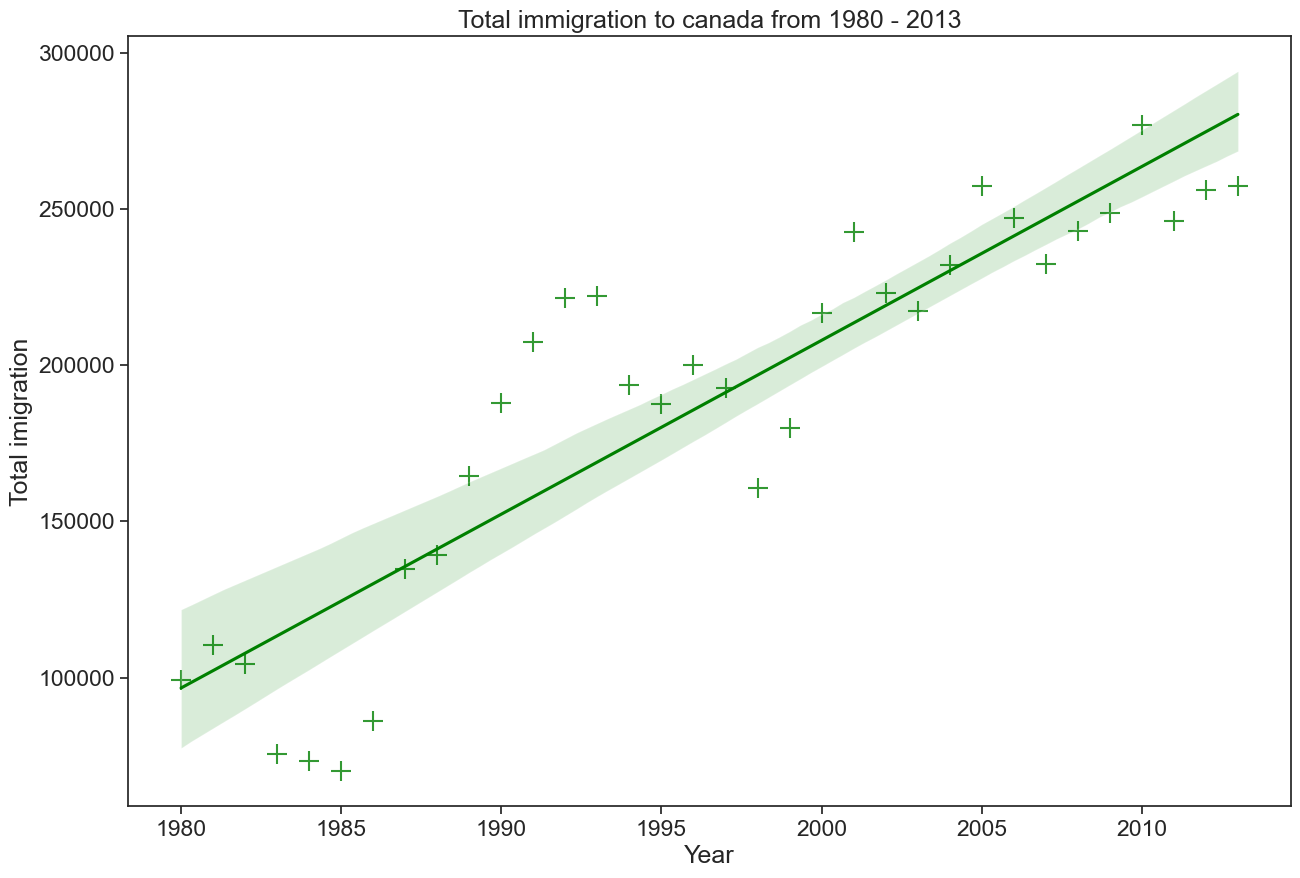

In [42]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('ticks')
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

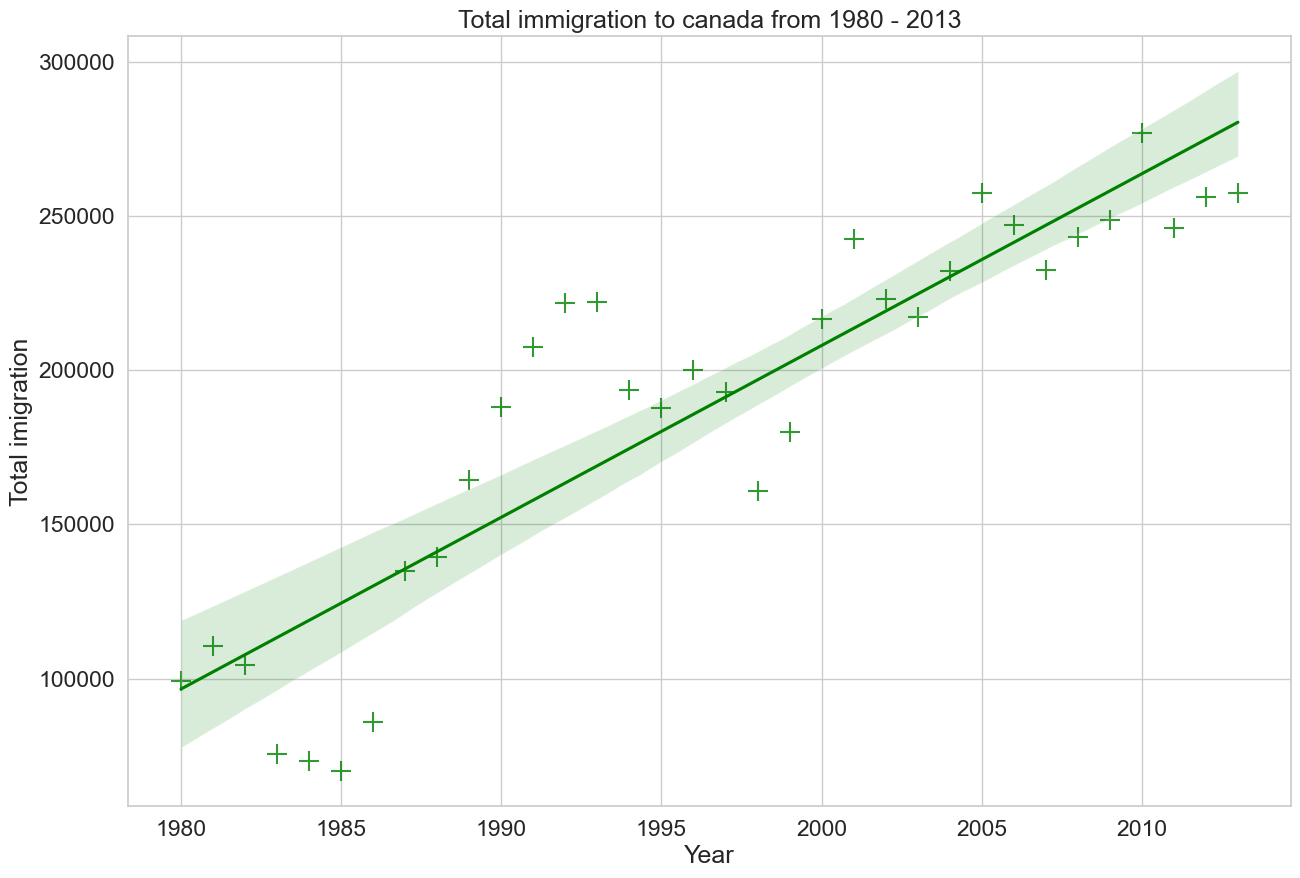

In [43]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('whitegrid')
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration from Denmark, Sweden, and Norway to canada from 1980 - 2013')

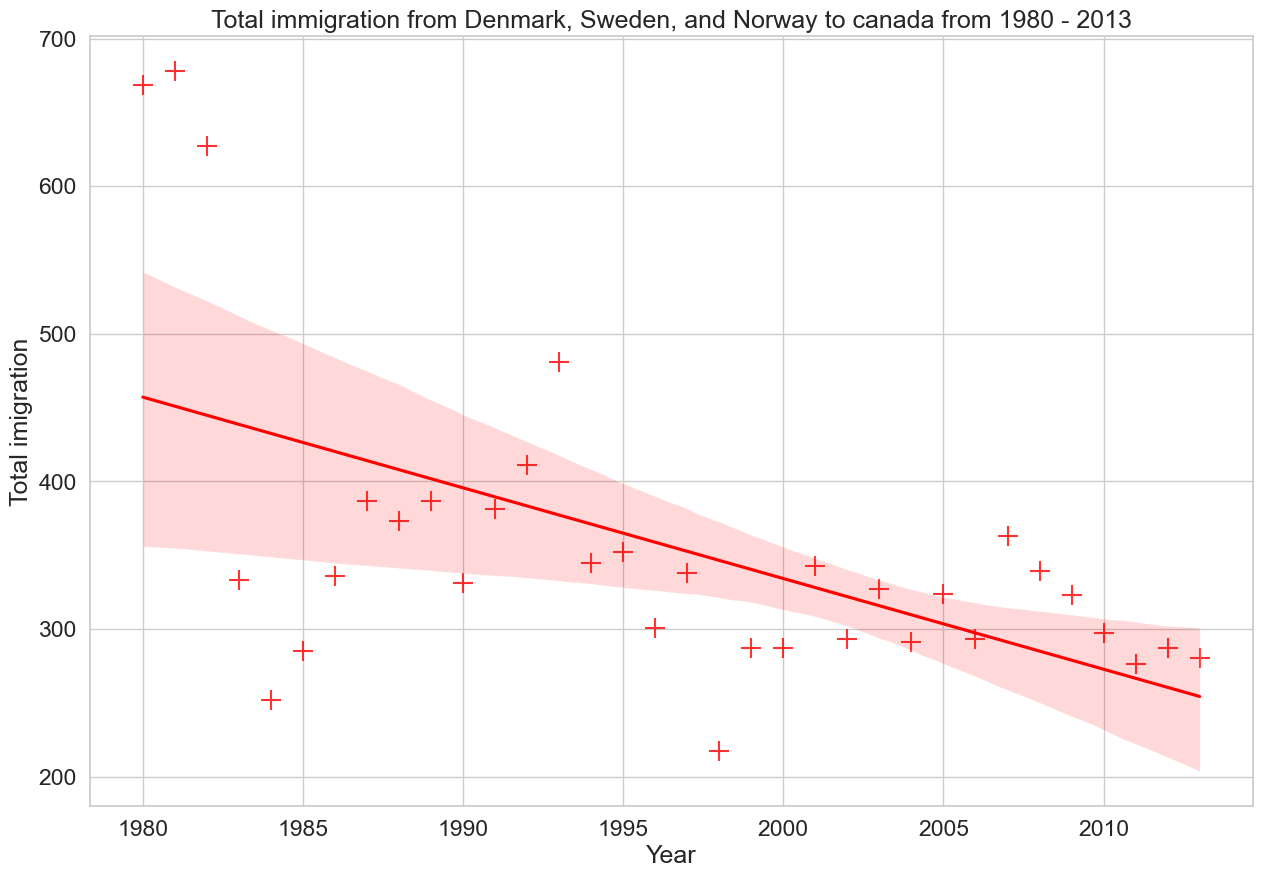

In [45]:
# membuat dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],
years].transpose()

# membuat total dengan sum
df_total = pd.DataFrame(df_countries.sum(axis=1))

#reset index in place
df_total.reset_index(inplace=True)
#rename columns
df_total.columns = ['year', 'total']
#change column year from string to int
df_total['year'] = df_total['year'].astype(int)


plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_total, color='red', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to canada from 1980 - 2013')